In [1]:
import dlib
import cv2
import numpy as np
import json
import matplotlib.pyplot as plt

# create list for landmarks
ALL = list(range(0, 68))
RIGHT_EYEBROW = list(range(17, 22))
LEFT_EYEBROW = list(range(22, 27))
RIGHT_EYE = list(range(36, 42))
LEFT_EYE = list(range(42, 48))
NOSE = list(range(27, 36))
MOUTH_OUTLINE = list(range(48, 61))
MOUTH_INNER = list(range(61, 68))
JAWLINE = list(range(0, 17))

# create face detector, predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

In [2]:
# read image
image_o = cv2.imread("temp.jpg", cv2.IMREAD_COLOR)

In [3]:
# resize the video
#W = 640
#H = 480
# = cv2.resize(image_o, dsize=(W, H), interpolation=cv2.INTER_AREA
image = image_o

In [4]:
# gray scale conversion
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [5]:
# Get only 1 face (up-sampling=1)
face = detector(img_gray, 1)[0]

In [6]:
# face wrapped with rectangle
cv2.rectangle(image, (face.left(), face.top()), (face.right(), face.bottom()),
              (0, 0, 255), 3)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [7]:
# make prediction and transform to numpy array
landmarks = predictor(image, face)

In [8]:
#create list to contain landmarks
landmark_list = []

# append (x, y) in landmark_list
for p in landmarks.parts():
    landmark_list.append([p.x, p.y])
    cv2.circle(image, (p.x, p.y), 2, (0, 255, 0), -1)

In [9]:
with open("landmarks.json", "w") as json_file :
    key_val = [ALL, landmark_list]
    landmark_dict = dict(zip(*key_val))
    print(landmark_dict)
    json_file.write(json.dumps(landmark_dict))
    json_file.write('\n')

{0: [475, 471], 1: [485, 541], 2: [498, 610], 3: [512, 679], 4: [533, 746], 5: [569, 803], 6: [620, 851], 7: [680, 886], 8: [748, 900], 9: [814, 887], 10: [872, 851], 11: [920, 801], 12: [955, 740], 13: [977, 673], 14: [993, 603], 15: [1005, 532], 16: [1011, 459], 17: [521, 425], 18: [561, 403], 19: [609, 401], 20: [654, 416], 21: [700, 436], 22: [788, 435], 23: [830, 413], 24: [873, 397], 25: [921, 395], 26: [962, 416], 27: [747, 484], 28: [749, 527], 29: [751, 570], 30: [753, 613], 31: [715, 653], 32: [733, 659], 33: [752, 664], 34: [770, 658], 35: [787, 651], 36: [577, 492], 37: [605, 471], 38: [642, 473], 39: [671, 499], 40: [638, 508], 41: [602, 508], 42: [816, 496], 43: [845, 468], 44: [882, 465], 45: [913, 485], 46: [887, 503], 47: [850, 504], 48: [660, 738], 49: [697, 718], 50: [731, 706], 51: [752, 711], 52: [771, 705], 53: [801, 717], 54: [838, 736], 55: [802, 770], 56: [773, 785], 57: [752, 788], 58: [728, 786], 59: [695, 772], 60: [680, 742], 61: [730, 737], 62: [752, 736],

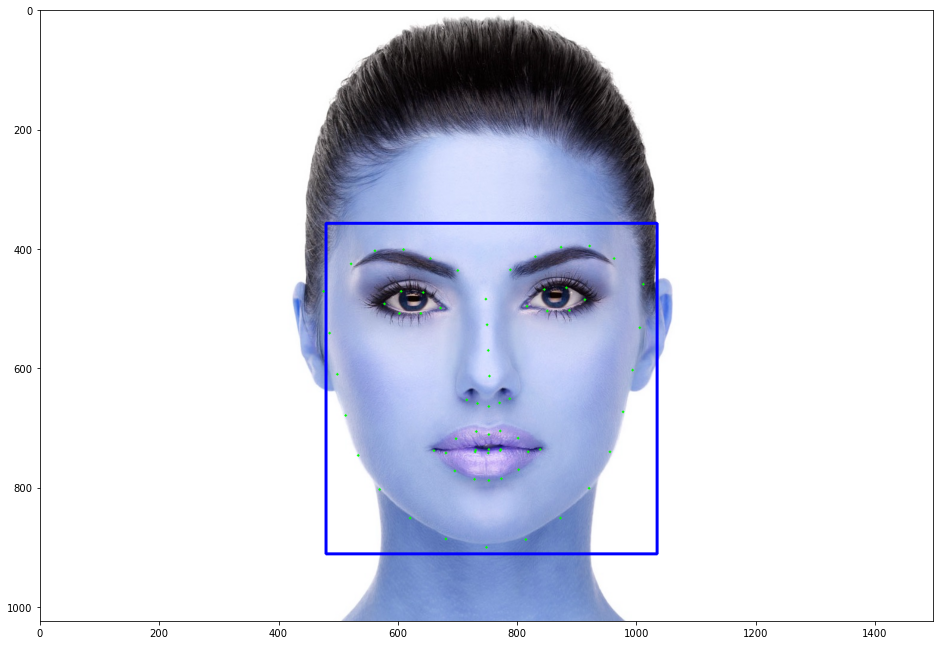

In [10]:
plt.figure(figsize=(16, 12))
plt.imshow(image)
plt.show()

In [11]:
cv2.imshow('result', image)
cv2.waitKey(0)
cv2.destroyAllWindows()